# Corona Text Mining

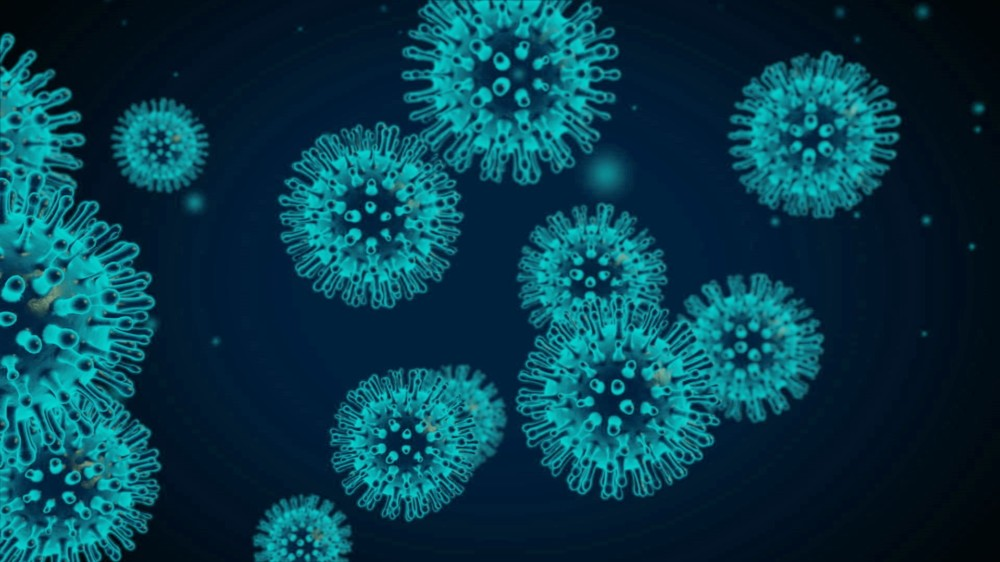

### Text mining applied to research papers to gain insights on viruses, their transmission and possibly uncover some hidden knowledge

Using algorithms like **Word2Vec, Doc2Vec** and **FastText**, similar documents can be recognized and sorted.

Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that cosine similarity can be calculated to identify related words that share common contexts in the corpus.



By applying topic modeling and clustering we can better understand how the current body of literature is divided and what the common themes for those papers are.

## Please note that the outputs of the models are not representative, because they were trained on a low number of epochs, to commit the notebook in a reasonable time.

In [ ]:
tasks=[
    ["Seasonality of transmission"],
    ["Persistence of virus on surfaces of different materials (e,g., copper, stainless steel, plastic)"],
    ["Natural history of the virus and shedding of it from an infected person"],
    ["Implementation of diagnostics and products to improve clinical processes"],
    ["Disease models, including animal models for infection, disease and transmission"],
    ["Tools and studies to monitor phenotypic change and potential adaptation of the virus"],
    ["Immune response and immunity"],
    ["Role of the environment in transmission"]
]

In [ ]:
import pandas as pd
import numpy as np
import json
import math
import glob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.spatial import distance
from wordcloud import WordCloud

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag

import gensim
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import seaborn as sns
import matplotlib.pyplot as plt
import string
import spacy
from collections import  Counter
import os
import multiprocessing
import re

import matplotlib.style as style


In [ ]:
style.use('fivethirtyeight')

In [ ]:
stopwords = ["chapter", "fig", "peer", "researchers"," ma", " ma", "study" "review", "peer-reviewed", "a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and",
             "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being",
             "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn",
             "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", 
             "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", 
             "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more",
             "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", 
             "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", 
             "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", 
             "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're",
             "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else",
             "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got",
             "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", 
             "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", 
             "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", 
             "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", 
             "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas",
             "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding",
             "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due",
             "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
             "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made",
             "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
             "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby",
             "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc",
             "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", 
             "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]

In [ ]:
stemmer = PorterStemmer()
lem = WordNetLemmatizer()

# Load data

In [ ]:
data = pd.read_csv("../input/cord19/CORD-19.csv")

In [ ]:
data.head()

In [ ]:
data['text'][7][:300]

# Preprocessing NLTK

### This function will remove punctuation and stopwords.

In [ ]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]  # "first article" , "second article" , ...

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)                                            # "first articlesecond article ..." 
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords]

In [ ]:
data = data[data['has_full_text'] != False]

### Make text lowercase

In [ ]:
text = data['text']

low_text = text.apply(lambda x: str(x).lower())
low_text.head()

### ... and apply text_process (remove stopwords and punctuation)

In [ ]:
text_pre = low_text.apply(text_process) 
text_pre.head()

# Lemmatization

In [ ]:
text_lem = text_pre.apply(lambda x: [lem.lemmatize(y) for y in x if len(x)>2]) #integrate this step in function 
text_lem.head()

## I did the same steps for the titles and then saved the clean output due to RAM issues as csv, which I am loading in below

In [ ]:
#os.chdir("/home/leon/Documents/python/challenge")

In [ ]:
data = pd.read_csv('../input/final-clean/final_clean.csv')

In [ ]:
data.head()

In [ ]:
title = data['clean_title']
text = data['clean_text']

In [ ]:
print(title[:5])
print('\n')
print(text[:5])

## Lets see the most frequent words in titles and text

## Titles

First split the strings into lists of tokens

In [ ]:
ls= []

for i in title:
    ls.append(str(i).split())

Then calculate the frequency of each token

In [ ]:
fdist = FreqDist()

for sentence in ls:
    for token in sentence:
        fdist[token] +=1

Pick the most common words

In [ ]:
top_title = fdist.most_common(20)

In [ ]:
top_title[:5]

Iterate over list of tuples and create dataframe with word and frequency respectively

In [ ]:
ls = []
for i in top_title:
    ls.append({'Word': i[0], 'Num': i[1]})

df = pd.DataFrame(ls)

In [ ]:
df.iloc[:5]

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data = df, y = 'Word', x = 'Num')
plt.xlabel('Ocurrences', fontsize=14)

# Same for main text

first remove all numbers

In [ ]:
ls= []

for i in text:
    ls.append(str(i).split())

In [ ]:
no = []  #create one list containing every word in the titles

for i in ls:
    for j in i:
        no.append(j)

In [ ]:
def remove_special_characters(text):
    text = re.sub('[0-9]', '', text)
    return text

In [ ]:
no_num = []

for i in no:
    no_num.append(remove_special_characters(i))

In [ ]:
#ls_text = []
#
#for i in text[:100]:
#    ls_text.append(str(i).split())

In [ ]:
fdist = FreqDist()

for token in no_num:
        fdist[token] +=1

In [ ]:
top_text = fdist.most_common(21)

In [ ]:
top_text[:5]

In [ ]:
text_topwords = []
for i in top_text:    # iterate through tuples to create dataframe
    text_topwords.append({'Word': i[0],
                          'Num': i[1],
                         '10K' : i[1]/10000})

df = pd.DataFrame(text_topwords)

In [ ]:
df.drop(0, axis=0,inplace=True) #remove white space which was used as replacement for numbers

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data = df, y = 'Word', x = '10K')
plt.xlabel('Ocurrences in Thousands', fontsize=14)

# Wordcloud

In [ ]:
title

In [ ]:
ls= []

for i in title:
    ls.append(str(i).split())

In [ ]:
ls[:2] # split text into tokens which are stored in lists

In [ ]:
no = []  #create one list containing every word in the titles

for i in ls:
    for j in i:
        no.append(j)

In [ ]:
from wordcloud import WordCloud

In [ ]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(no))
plt.title("Most discussed terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

# POS tagging

In [ ]:
ls= []

for i in title:
    ls.append(str(i).split())

In [ ]:
data['n'] = ls

In [ ]:
data.iloc[:2]

In [ ]:
pos = data['n'][:5].apply(lambda x: nltk.pos_tag(x)) #integrate this step in function 
pos.head()

## Word2Vec (for now with only the lemmatized text)

I will use Word2Vec (sg = 1 (Skipgram)), to identify the context words around a specific center word. This way I can compute similar words to an input word of my choice.

Word2Vec requires a format of ‘list of lists’ for training where every document is contained in a list and every list contains lists of tokens of that document.

In [ ]:
title

In [ ]:
w2v= []#create list of lists

for i in title:
    w2v.append(str(i).split())

In [ ]:
w2v[:3] 

Word2Vec applies cosine similarity between the word-vectors in the weight matrix to compute similarity.

In [ ]:
# sg=1 -> skipgram
# big window size to catch the general environment of the center word

model = Word2Vec(w2v,
                 min_count=1,
                 size= 100,
                 workers=multiprocessing.cpu_count()-1,
                 window = 5,
                 sg = 1,
                 iter=100,
                 negative=5,
                 sample=10e-6)

## RAM will be a problem with 30 mio tokens

If i dont find a proper solution to run the models, downsampling would be an option.

Now the model is trained and we can look for similar terms

In [ ]:
model.most_similar('respiratory') 

# Doc2Vec

### To compare documents and find related ones

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(w2v)]

In [ ]:

# dm=1 -> distributed memory
model_ = Doc2Vec(documents=documents,
                dm=1,
                vector_size=300,
                window_size=10,
                epochs = 50,
                workers=multiprocessing.cpu_count() -1,
                min_count=1,
                negative=5,
                sample=10e-6,
                min_alpha=0.0001,
                alpha=0.025)

In [ ]:
tokens = ('seasonality of transmission').split()  # Seasonality of transmission

new_vector = model_.infer_vector(tokens)
sims = model_.docvecs.most_similar([new_vector])
sims[:5] # now we can see the indices of the most similar papers

In [ ]:
articles = [i[0] for i in sims]

In [ ]:
pd.options.display.max_colwidth = 100

data.iloc[articles]['title'] # research papers which are related to the passed string above

## With the above model, one can find out many sources of information about a topic of choice.

# Clustering


Here **Bag-Of-Words** and **TF/IDF** weighting applied, to do clustering later on.

In [ ]:
title = title.dropna()

len(title)

In [ ]:
w2v= []   #create list of lists

for i in title:
    w2v.append(str(i).split())

In [ ]:
no = []  #create one list containing every word in the titles

for i in w2v:
    for j in i:
        no.append(j)

In [ ]:
no[:10]

# Bag of Words

In [ ]:
bow_transformer = CountVectorizer().fit(no) 

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

In [ ]:
# bow_transformer.vocabulary_

In [ ]:
data_bow = bow_transformer.transform(title)

In [ ]:
print('Shape of Sparse Matrix: ', data_bow.shape)# 300 rows (each a document) x 41023 columns (each a unique word)
print('Amount of Non-Zero occurences: ', data_bow.nnz) 

In [ ]:
print(data_bow) # first doc contains the words in rows: 1, 287, 288, 431...
print('\n')
print(data_bow.shape)

In [ ]:
print(bow_transformer.get_feature_names()[5085])
print(bow_transformer.get_feature_names()[12023])

# TF/IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(data_bow)

In [ ]:
data_tfidf = tfidf_transformer.transform(data_bow)
print(data_tfidf.shape)

# k-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=6).fit(data_tfidf)


In [ ]:
kmeans.inertia_

## Apply Elbow method to find optimal k

In [ ]:
# it took too long so i printed the output below



#   SSE = []
#   for cluster in range(1,20):
#       kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
#       kmeans.fit(data_tfidf)
#       SSE.append(kmeans.inertia_)
#   
#   # converting the results into a dataframe and plotting them
#   frame = pd.DataFrame({'Cluster':range(20,40), 'SSE':SSE})
#   plt.figure(figsize=(12,6))
#   plt.plot(frame['Cluster'], frame['SSE'], marker='o')
#   plt.xlabel('Number of clusters')
#   plt.ylabel('Inertia')

# SSE for 1-20 clusters:

- 27505.811443138384,
- 27345.925525524854,
- 27245.215028068233,
- 27147.642084227915,
- 27068.668335396258,
- 27028.02880759061,
- 26952.062151422502,
- 26891.496983984216,
- 26836.947145644648,
- 26749.776461986112,
- 26729.37520808019,
- 26694.768607619822,
- 26664.429563103273,
- 26609.221275837324,
- 26550.978657363143,
- 26501.241635956863,
- 26492.45400413421,
- 26454.65331154789,
- 26397.757836280794
 
 ## The graph was steady going down but I couldnt compute to a higher amount of clusters because it took too long

In [ ]:
kmeans = KMeans(n_jobs = -1, n_clusters = 25, init='k-means++')
kmeans.fit(data_tfidf)
pred = kmeans.predict(data_tfidf)

In [ ]:
kmeans.inertia_

### How many papers are in the same cluster?

In [ ]:
frame = pd.DataFrame(data_tfidf)
frame['cluster'] = pred
frame['cluster'].value_counts()

# Use Titles to apply topic modeling

In [ ]:
title

### Transform column of lists to column of strings

In [ ]:
topic_input = []

for i in title:
    topic_input.append(str(i).split())

In [ ]:
topic_input[:50]

In [ ]:
# create dictionary -> every unique word in lemmatized titles
dic=gensim.corpora.Dictionary(topic_input)

# create corpus -> term document frequency
# doc2bow() simply counts the number of occurrences of each distinct word, 
# converts the word to its integer word ID and returns the result as a sparse vector.
bow_corpus = [dic.doc2bow(doc) for doc in topic_input]

In [ ]:
print(len(bow_corpus[0]))  #term frequency
print('\n')
print(len(bow_corpus))  #lemma words

In [ ]:
print(dic)
print('\n')
print('The first document/title contains the following (words/ID , amount of times):', bow_corpus[0][:3])

#documents are split in lists

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dic,
                                           num_topics=25, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=1,
                                           per_word_topics=True)

In [ ]:
lda_model.show_topics()

### Again, here i only ran 1 iteration, after 100 iterations I had following output:


0,
  '0.000*"genotyping" + 0.000*"endonuclease" + 0.000*"postpcr" + 0.000*"rejection" + 0.000*"allograft" + 0.000*"immunosuppressive" + 0.000*"cd4foxp3" + 0.000*"cd8cd122" + 0.000*"spongederived" + 0.000*"fungus"'),
  
1,
  '0.073*"virus" + 0.047*"coronavirus" + 0.028*"cell" + 0.027*"protein" + 0.026*"human" + 0.017*"rna" + 0.017*"influenza" + 0.012*"characterization" + 0.011*"role" + 0.010*"activity"'),
  
2,
  '0.091*"viral" + 0.050*"response" + 0.044*"china" + 0.036*"health" + 0.027*"development" + 0.024*"ebola" + 0.023*"lung" + 0.020*"strategy" + 0.016*"pathogenesis" + 0.016*"peptide"'),
  
3,
  '0.000*"genotyping" + 0.000*"endonuclease" + 0.000*"postpcr" + 0.000*"rejection" + 0.000*"allograft" + 0.000*"immunosuppressive" + 0.000*"cd4foxp3" + 0.000*"cd8cd122" + 0.000*"spongederived" + 0.000*"fungus"'),
  
4,
  '0.000*"genotyping" + 0.000*"endonuclease" + 0.000*"postpcr" + 0.000*"rejection" + 0.000*"allograft" + 0.000*"immunosuppressive" + 0.000*"cd4foxp3" + 0.000*"cd8cd122" + 0.000*"spongederived" + 0.000*"fungus"'),
  
5,
  '0.070*"disease" + 0.040*"study" + 0.038*"outbreak" + 0.031*"epidemic" + 0.025*"model" + 0.023*"patient" + 0.022*"approach" + 0.021*"clinical" + 0.021*"middle" + 0.020*"merscov"'),
  
6,
  '0.086*"analysis" + 0.063*"infectious" + 0.036*"2019" + 0.033*"case" + 0.026*"global" + 0.024*"sars" + 0.024*"factor" + 0.020*"epidemiology" + 0.019*"fever" + 0.019*"investigation"'),
  
7,
  '0.062*"covid19" + 0.054*"syndrome" + 0.039*"pneumonia" + 0.031*"severe" + 0.024*"sarscov" + 0.021*"potential" + 0.019*"sarscov2" + 0.019*"therapeutic" + 0.019*"treatment" + 0.018*"pathogen"'),
  
8,
 '0.047*"antiviral" + 0.046*"gene" + 0.030*"identification" + 0.022*"replication" + 0.019*"evaluation" + 0.019*"design" + 0.018*"genetic" + 0.018*"evolution" + 0.017*"reverse" + 0.016*"risk"'),
  
9,
  '0.106*"infection" + 0.092*"respiratory" + 0.033*"acute" + 0.029*"antibody" + 0.026*"vaccine" + 0.024*"detection" + 0.022*"east" + 0.020*"child" + 0.019*"tract" + 0.018*"immune"')



Topic 0 Biological processes 

Topic 1 about the actual virus and its cell structures

Topic 2 Origin of the virus ('china + 'pathogenesis') 

Topic 3 Genotype and biological processes of the virus

Topic 5 human reaction to epidemics

Topic 6 emperical research about virus on global scale

Topic 7 effects of virus + comparison to sars

Topic 8 identification of viruses

Topic 9 more specific effects of infection
